# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import statsmodels.api as sm

# Reading the bank data

In [2]:
data=pd.read_csv("/content/bank_data.csv")

In [3]:
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [4]:
data.shape

(1882, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [6]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


As we can see  our data is composed of  6 columns and 1882 records.
The columns contain imformation about the customers and there recovery_amount the expected one and the actual one. Also, there is a column that classify the level of the recovery and then a column about the gender of the costumer

# Data prepocessing

## Data cleaning

### *Handling missing values*

Let's start first by detecting if there is any missing values in our data

In [7]:
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

As we can see the data does not contain any missing data

### *Handling duplicates*

Let's start first by detecting if there is any duplicate values in our data

In [8]:
data.duplicated().sum()

0

The result shows that there is no duplicate values

### Handling Outliers

In this step we are going to explore two diferent methods to detect outliers.
 We are going to start by visualisation which means we are going to plot the boxplot and detect visually the outliers, then we are going to use statistical methods such as the Z-score.

1. ***Visual Inspection:***

Plotting the data using visualizations like box plots to identify outliers visually.

We are going to plotthe boxplot for the age, the expected_recovery_amount and the acual_recovery_amount

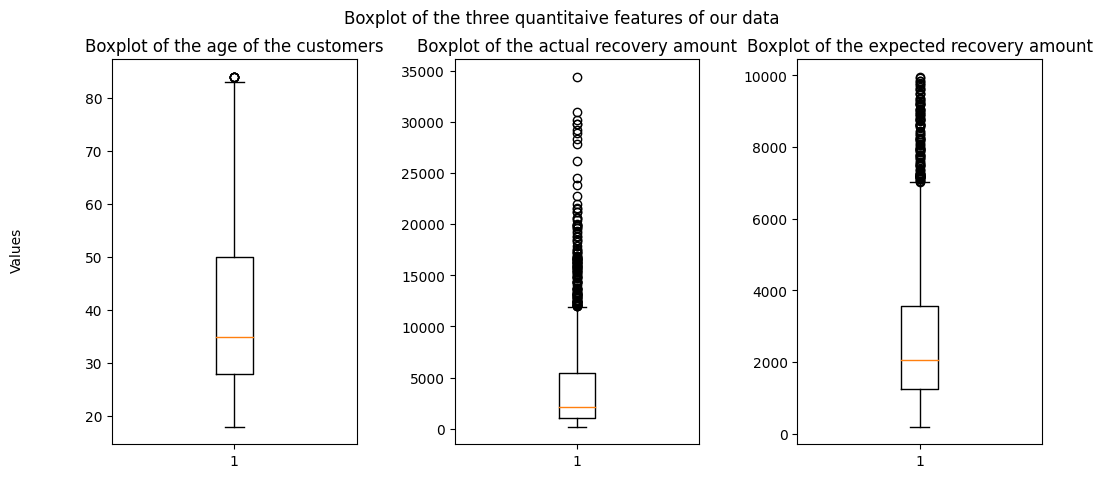

In [9]:
# Create a figure with three subplots (one row, three columns)
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Plot the first dataset in the first subplot
axs[0].boxplot(data['age'])
axs[0].set_title('Boxplot of the age of the customers')

# Plot the second dataset in the second subplot
axs[1].boxplot(data['actual_recovery_amount'])
axs[1].set_title('Boxplot of the actual recovery amount')

# Plot the third dataset in the third subplot
axs[2].boxplot(data['expected_recovery_amount'])
axs[2].set_title('Boxplot of the expected recovery amount')

# Add a common y-axis label for all subplots
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

# Add a title for the entire figure
fig.suptitle('Boxplot of the three quantitaive features of our data')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

2. ***Statistical Methods:***

Using statistical techniques to detect outliers. One common method is the Z-score, which measures how many standard deviations a data point is away from the mean. Data points with a Z-score beyond a certain threshold (e.g., Z-score > 3 or Z-score < -3) are considered outliers.

In [10]:
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers in the given dataset using the Z-score method.

    Parameters:
        data (list or numpy array): The dataset for which outliers need to be detected.
        threshold (float): The Z-score threshold beyond which data points are considered outliers.
                           Default is 3.

    Returns:
        list: A list containing the indices of the outlier data points in the original dataset.
    """
    # Convert the input data to a numpy array
    data = np.array(data)

    # Calculate the mean and standard deviation of the data
    mean = np.mean(data)
    std = np.std(data)

    # Calculate the Z-scores for each data point
    z_scores = (data - mean) / std

    # Find the indices of data points with Z-scores beyond the threshold
    outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

    return outlier_indices

In [11]:
detect_outliers_zscore(data['age'], threshold=3)

array([], dtype=int64)

In [12]:
detect_outliers_zscore(data['expected_recovery_amount'], threshold=3)

array([1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858,
       1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869,
       1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881])

In [13]:
detect_outliers_zscore(data['actual_recovery_amount'], threshold=3)

array([1560, 1590, 1612, 1659, 1722, 1742, 1745, 1748, 1763, 1771, 1784,
       1796, 1797, 1798, 1810, 1826, 1837, 1841, 1856, 1857, 1859, 1860,
       1862, 1864, 1865, 1866, 1868, 1869, 1870, 1871, 1872, 1873, 1875,
       1876, 1879, 1880])

As we can see according to both the two methods there is a considerable number of outliers espesially in the two columns expected_amount_recovery and actual_amount_recovery

## Data transformation

### Encoding categorical variables

In our case, we are having two nominal categorical variables that are the sex and the recovery strategy.

For nominal categorical variables (categories without an inherent order), use one-hot encoding to create binary columns for each category. Pandas provides the get_dummies() function to perform one-hot encoding.


In [14]:

df = pd.DataFrame(data)

# Perform one-hot encoding on 'Color' column

df_encoded = pd.get_dummies(df, columns=['recovery_strategy','sex'])

In [15]:
df_encoded

,id,expected_recovery_amount,actual_recovery_amount,age,recovery_strategy_Level 0 Recovery,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery,sex_Female,sex_Male
0,2030,194,263.540000,19,1,0,0,0,0,0,1
1,1150,486,416.090000,25,1,0,0,0,0,1,0
2,380,527,429.350000,27,1,0,0,0,0,0,1
3,1838,536,296.990000,25,1,0,0,0,0,0,1
4,1995,541,346.385000,34,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,65,0,0,0,0,1,1,0
1878,196,9857,9709.909257,68,0,0,0,0,1,1,0
1879,313,9859,30209.181790,58,0,0,0,0,1,1,0
1880,1781,9920,20386.232190,67,0,0,0,0,1,1,0


In this phase we have created some new columns in order to encode the nominal categorical data that we used to have

### Feature engineering

In [16]:
df_encoded.drop('id', axis=1, inplace=True)

In [17]:
df_encoded

,expected_recovery_amount,actual_recovery_amount,age,recovery_strategy_Level 0 Recovery,recovery_strategy_Level 1 Recovery,recovery_strategy_Level 2 Recovery,recovery_strategy_Level 3 Recovery,recovery_strategy_Level 4 Recovery,sex_Female,sex_Male
0,194,263.540000,19,1,0,0,0,0,0,1
1,486,416.090000,25,1,0,0,0,0,1,0
2,527,429.350000,27,1,0,0,0,0,0,1
3,536,296.990000,25,1,0,0,0,0,0,1
4,541,346.385000,34,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1877,9785,15388.195990,65,0,0,0,0,1,1,0
1878,9857,9709.909257,68,0,0,0,0,1,1,0
1879,9859,30209.181790,58,0,0,0,0,1,1,0
1880,9920,20386.232190,67,0,0,0,0,1,1,0


# EDA

## Statistical test: age vs. expected recovery amount

Let's start by answering this question: Are there other factors besides Expected Recovery Amount that also varied systematically across the $1000 threshold. Let's see if the age also change.

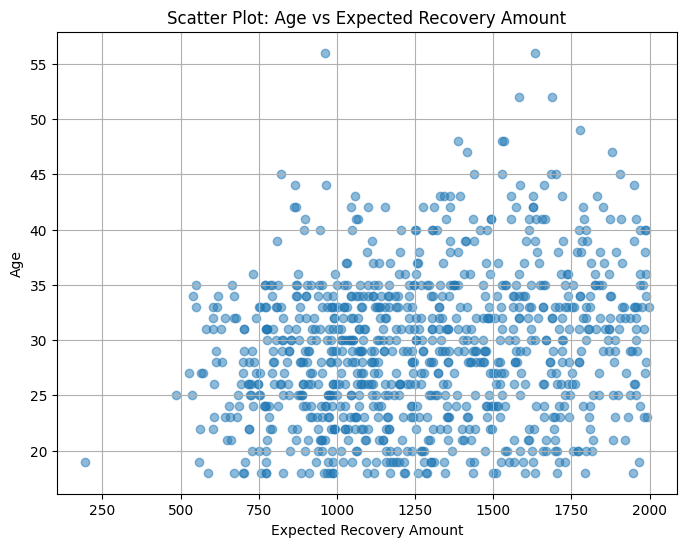

In [18]:

filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'], alpha=0.5)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Scatter Plot: Age vs Expected Recovery Amount')
plt.grid(True)
plt.show()

As we can see there is no discontinuity in the values of age at the expected recovery amount.The scatter plot of age versus Expected Recovery Amount did not show an obvious jump around $1000

Let's do some statistical analysis examining the average age of the customers just above and just below the threshold. We can start by exploring the range from $900 to $1100.

In [19]:
threshold_lower = 900
threshold_upper = 1100
filtered_df = data[(data['expected_recovery_amount'] >= threshold_lower) & (data['expected_recovery_amount'] <= threshold_upper)]

above_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] > 1000]
below_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] < 1000]

average_age_above = above_threshold_df['age'].mean()
average_age_above = below_threshold_df['age'].mean()

print("Average age of customers just above the threshold ($900 to $1000):", average_age_above)
print("Average age of customers just below the threshold ($1000 to $1100):", average_age_below)

Average age of customers just above the threshold ($900 to $1000): 28.68421052631579
Average age of customers just below the threshold ($1000 to $1100): 27.21590909090909


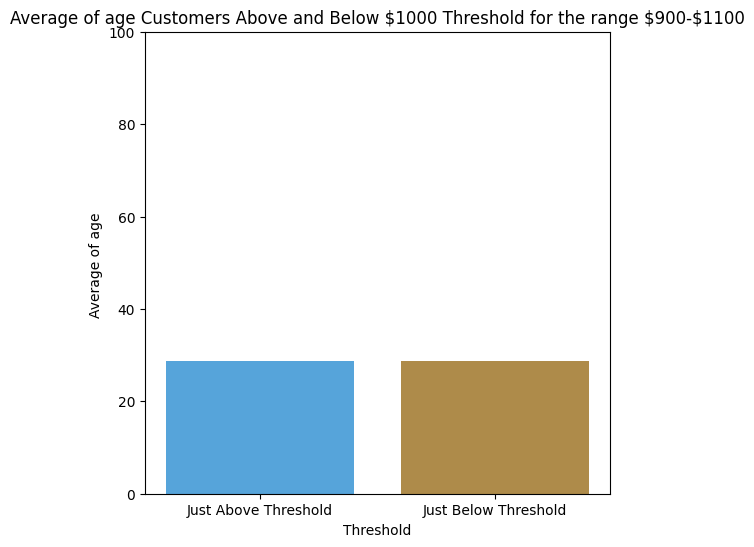

In [30]:
# Bar chart

labels = ['Just Above Threshold', 'Just Below Threshold']
sizes = [average_age_above, average_age_above]
colors = ['#56A4DA', '#AE8B4A']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Threshold')
plt.ylabel('Average of age ')
plt.title('Average of age Customers Above and Below $1000 Threshold for the range $900-$1100')
plt.ylim(0, 100)  # Set the y-axis limit to show percentages from 0 to 100
plt.show()

We can see that the averages of the ages above and below the threeshold for the range from (900$ to 1100$) are kind of close

***Conclusion:***

We were able to convince ourselves that there is no major jump in the average customer age just above and just below the $1000 threshold by doing a statistical test as well as exploring it graphically with a scatter plot.

## Statistical test: sex vs. expected recovery amount

In [20]:

threshold_lower = 900
threshold_upper = 1100
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

above_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] > 1000]
below_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] < 1000]

percentage_male_above = above_threshold_df['sex_Male'].mean() * 100
percentage_male_below = below_threshold_df['sex_Male'].mean() * 100

print("Percentage of male customers just above the threshold ($900 to $1100): {:.2f}%".format(percentage_male_above))
print("Percentage of male customers just below the threshold ($900 to $1100): {:.2f}%".format(percentage_male_below))


Percentage of male customers just above the threshold ($900 to $1100): 57.89%
Percentage of male customers just below the threshold ($900 to $1100): 63.64%


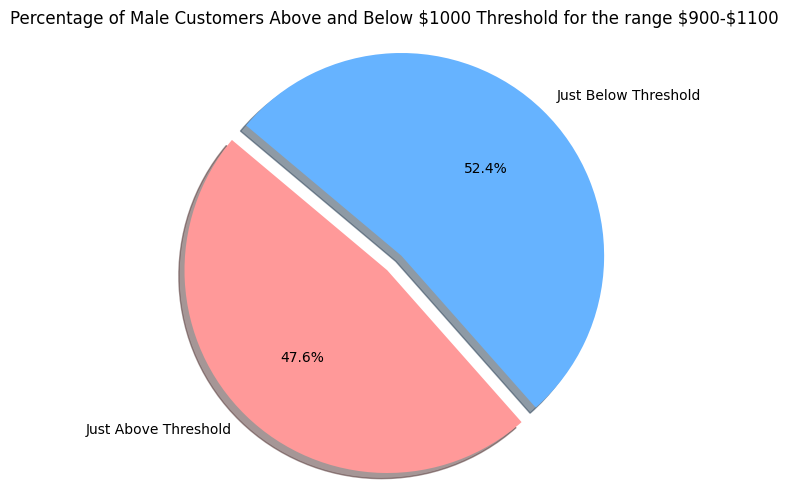

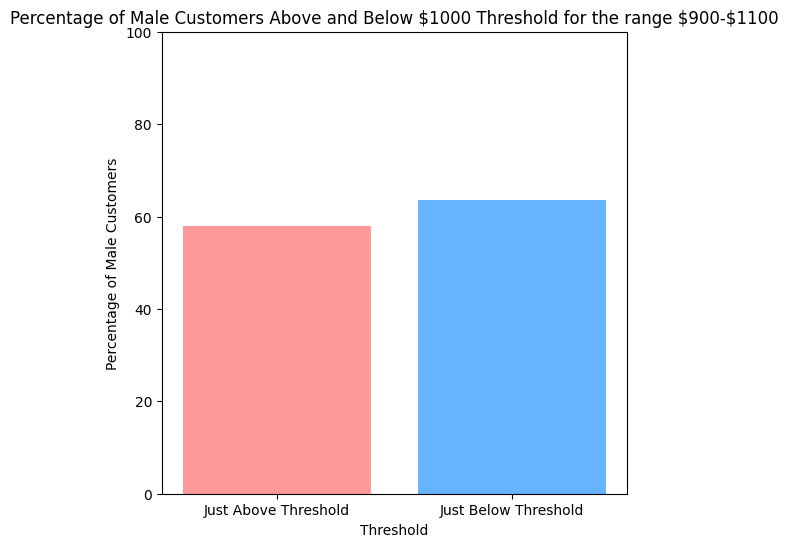

In [21]:
# Pie chart
labels = ['Just Above Threshold', 'Just Below Threshold']
sizes = [percentage_male_above, percentage_male_below]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Male Customers Above and Below $1000 Threshold for the range $900-$1100')
plt.show()

# Bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Threshold')
plt.ylabel('Percentage of Male Customers')
plt.title('Percentage of Male Customers Above and Below $1000 Threshold for the range $900-$1100')
plt.ylim(0, 100)  # Set the y-axis limit to show percentages from 0 to 100
plt.show()

We are now reasonably confident that customers just above and just below the $1000 threshold are, on average, similar in terms of  the percentage that are male.

## Exploratory graphical analysis: recovery amount

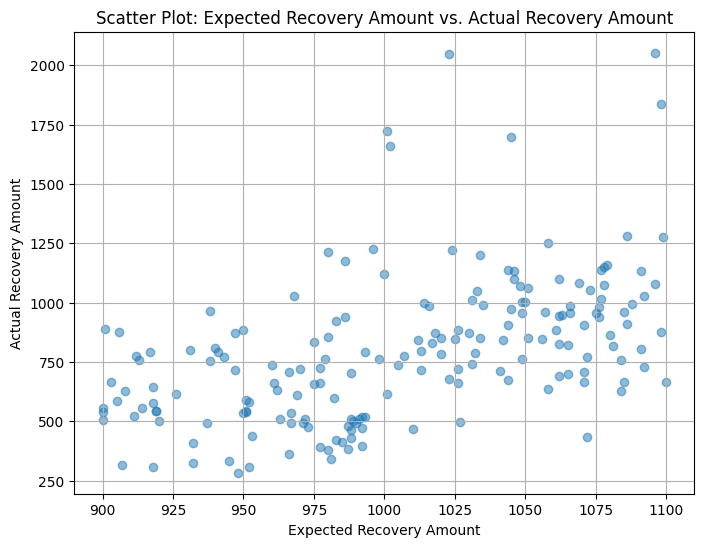

In [22]:
threshold_lower = 900
threshold_upper = 1100
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['expected_recovery_amount'], filtered_df['actual_recovery_amount'], alpha=0.5)
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Scatter Plot: Expected Recovery Amount vs. Actual Recovery Amount')
plt.grid(True)
plt.show()

We can see a jump in the actual recovery amount that became quite big comparing to the ones above the threshold

## Statistical analysis: recovery amount

We are going to perform the Kruskal-Wallis test which is a non-parametric statistical test used to compare the medians of two or more independent groups when the data does not meet the assumptions of normality required for parametric tests like the t-test or ANOVA.
We will do this statistical tests to see if the actual recovery amount has a discontinuity above the $1000 threshold.

We are going to do this for two different windows of the expected recovery amount $900 to $1100 and for a narrow range of $950 to $1050 to see if our results are consistent.

In [23]:

threshold_lower = 900
threshold_upper = 1100
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

above_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] > 1000]
below_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] < 1000]


statistic, p_value = kruskal(above_threshold_df['actual_recovery_amount'], below_threshold_df['actual_recovery_amount'])

# Display the results
print("Kruskal-Wallis Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.")

Kruskal-Wallis Test:
Test Statistic: 67.38392708550032
p-value: 2.2346330990871586e-16
The Kruskal-Wallis test result is statistically significant.
There are significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.


In [24]:
threshold_lower = 950
threshold_upper = 1050
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

above_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] > 1000]
below_threshold_df = filtered_df[filtered_df['expected_recovery_amount'] < 1000]


statistic, p_value = kruskal(above_threshold_df['actual_recovery_amount'], below_threshold_df['actual_recovery_amount'])

# Display the results
print("Kruskal-Wallis Test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The Kruskal-Wallis test result is statistically significant.")
    print("There are significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.")
else:
    print("The Kruskal-Wallis test result is not statistically significant.")
    print("There are no significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.")

Kruskal-Wallis Test:
Test Statistic: 33.0431604938272
p-value: 9.013556650854467e-09
The Kruskal-Wallis test result is statistically significant.
There are significant differences in the 'Actual Recovery Amount' among groups above and below the $1000 threshold.


## Regression modeling: no threshold

In [25]:
threshold_lower = 900
threshold_upper = 1100
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

X =filtered_df['expected_recovery_amount']
y = filtered_df['actual_recovery_amount']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           3.65e-13
Time:                            11:38:57   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

The R-squared value is 0.253, which means that approximately 25.3% of the variance in the 'Actual Recovery Amount' can be explained by the 'Expected Recovery Amount' in this model. This indicates a relatively strong fit for the model.

The results shows that there is a strong positive relationship between these two variables.

## Regression modeling: adding true threshold

In [27]:

threshold_lower = 900
threshold_upper = 1100
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

# Add the threshold indicator (0 for below threshold, 1 for above or equal to threshold)
filtered_df['Above Threshold'] = (filtered_df['expected_recovery_amount'] >= 1000).astype(int)

# Define the input (independent variables) and output (dependent variable)
X = filtered_df[['expected_recovery_amount', 'Above Threshold']]
y = filtered_df['actual_recovery_amount']

# Add a constant term to the input (intercept for the linear regression model)
X = sm.add_constant(X)

# Fit the linear regression model with the threshold indicator
model_with_threshold = sm.OLS(y, X).fit()

# Display the model summary
print(model_with_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.309
Model:                                OLS   Adj. R-squared:                  0.301
Method:                     Least Squares   F-statistic:                     40.43
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           3.06e-15
Time:                            13:24:55   Log-Likelihood:                -1279.3
No. Observations:                     184   AIC:                             2565.
Df Residuals:                         181   BIC:                             2574.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

<ipython-input-27-0e4e21e47ce3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Above Threshold'] = (filtered_df['expected_recovery_amount'] >= 1000).astype(int)


## Regression modeling: adjusting the window

The regression coefficient for the true threshold was statistically significant with an estimated impact of around $278 and a 95 percent confidence interval of $132 to $424. This is much larger than the incremental cost of running the higher recovery strategy which was $50 per customer. At this point, we are feeling reasonably confident that the higher recovery strategy is worth the additional costs of the program for customers just above and just below the threshold.


Before showing this to our managers, we want to convince ourselves that this result wasn't due just to us choosing a window of $900 to $1100 for the expected recovery amount. If the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we choose a slightly bigger or a slightly smaller window for the expected recovery amount. Let's repeat this analysis for the window of expected recovery amount from $950 to $1050 to see if we get similar results.

In [28]:

threshold_lower = 950
threshold_upper = 1050
filtered_df = df_encoded[(df_encoded['expected_recovery_amount'] >= threshold_lower) & (df_encoded['expected_recovery_amount'] <= threshold_upper)]

X_model1 = filtered_df['expected_recovery_amount']
y_model1 = filtered_df['actual_recovery_amount']

X_model1 = sm.add_constant(X_model1)

model1 = sm.OLS(y_model1, X_model1).fit()

print("Model 1: Linear Regression Without Threshold Indicator (Window: $950 to $1050)")
print(model1.summary())
print()

filtered_df['Above Threshold'] = (filtered_df['expected_recovery_amount'] >= 1000).astype(int)

X_model2 = filtered_df[['expected_recovery_amount', 'Above Threshold']]
y_model2 = filtered_df['actual_recovery_amount']

X_model2 = sm.add_constant(X_model2)

model2 = sm.OLS(y_model2, X_model2).fit()

print("Model 2: Linear Regression With Threshold Indicator (Window: $950 to $1050)")
print(model2.summary())


Model 1: Linear Regression Without Threshold Indicator (Window: $950 to $1050)
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.238
Model:                                OLS   Adj. R-squared:                  0.230
Method:                     Least Squares   F-statistic:                     30.64
Date:                    Thu, 20 Jul 2023   Prob (F-statistic):           2.60e-07
Time:                            13:35:51   Log-Likelihood:                -702.76
No. Observations:                     100   AIC:                             1410.
Df Residuals:                          98   BIC:                             1415.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975

<ipython-input-28-88c036143d78>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Above Threshold'] = (filtered_df['expected_recovery_amount'] >= 1000).astype(int)


We can see that the higher recovery strategy really had an impact of an extra few hundred dollars, then we should see a similar regression coefficient if we chooseba slightly smaller window for the expected recovery amount